# Psyplot data

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%matplotlib widget

In [10]:
import sys
print(sys.executable)

/users/vcherkas/miniconda3/envs/psyplot/bin/python


In [11]:
import os
 
for k, v in os.environ.items():
    if 'ECCODES' in str(k) or 'GRIB' in str(k):
        print('--------------')
        print(f'{k}={v}')

--------------
GRIB_DEFINITION_PATH=/oprusers/osm/opr.rh7.9/modules/eccodes_cosmo_resources/2.19.0.5/definitions:/oprusers/osm/opr.rh7.9/modules/eccodes/2.19.0-noomp/gnu-8.3.0-nocuda/share/eccodes/definitions


In [4]:
import eccodes as ecc
ecc.codes_set_samples_path('/oprusers/osm/opr.rh7.9/modules/eccodes_cosmo_resources/2.19.0.5/samples:/oprusers/osm/opr.rh7.9/modules/eccodes/2.19.0-noomp/gnu-8.3.0-nocuda/share/eccodes/samples:/scratch/cmerker/miniconda3/envs/test_grib/share/eccodes/samples')
ecc.codes_set_definitions_path('/oprusers/osm/opr.rh7.9/modules/eccodes_cosmo_resources/2.19.0.5/definitions:/oprusers/osm/opr.rh7.9/modules/eccodes/2.19.0-noomp/gnu-8.3.0-nocuda/share/eccodes/definitions:/scratch/cmerker/miniconda3/envs/test_grib/share/eccodes/definitions')

RuntimeError: Cannot find the ecCodes library

In [14]:
import cfgrib

In [15]:
import psyplot.project as psy

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from IPython.display import display, Video

from ipympl.backend_nbagg import Canvas
Canvas.header_visible.default_value = False

import warnings
warnings.filterwarnings("ignore", r"\s*The on_mappable_changed")
warnings.filterwarnings("ignore", r"\s*The input coordinates")
warnings.filterwarnings("ignore", r"\s*shading=")
warnings.filterwarnings("ignore", r"\s*\[Warning by")
warnings.filterwarnings("ignore", r"\s*ShapelyDeprecationWarning")

# To work with self-written modules, the paths of the modules directories have to be added
from pathlib import Path
import sys
icon_vis_dir = Path.cwd().parent
sys.path.insert(1,str(Path(icon_vis_dir,'data')))
sys.path.insert(1,str(Path(icon_vis_dir,'modules')))
sys.path.insert(1,str(Path(icon_vis_dir,'grid')))

In [ ]:
get_example_data()

In [16]:
f_icon_irr = '../data/example_data/grib/lfff00000000'
#f_icon_irr = '/scratch/walser/lfff00030000'
#f_icon_irr = '/scratch/vcherkas/icon-vis/data/example_data/grib/vnvt00010000'
f_icon_reg = '../data/example_data/grib/i1effsurf000_001'
f_cosmo    = '../data/example_data/laf2021112300'
f_nc    = '/users/vcherkas/visfiles/mch_opr_r04b07_lhn_12_atm_3d_ml_20190615T120000Z.nc'

gridfile   = '../data/example_data/grids/icon_grid_0001_R19B08_L.nc'


In [17]:
ds_nc = psy.open_dataset('/users/vcherkas/visfiles/mch_opr_r04b07_lhn_12_atm_3d_ml_20190615T120000Z.nc')
gridfile_for_nc = psy.open_dataset('/users/vcherkas/visfiles/mch_opr_r4b7_DOM01.nc')
wronggrid = psy.open_dataset('../data/example_data/grids/icon_grid_0001_R19B08_L.nc') 


ds_nc.lwflxall

<xarray.DataArray 'lwflxall' (time: 1, height_2: 81, ncells: 10700)>
[866700 values with dtype=float64]
Coordinates:
    clon      (ncells) float32 ...
    clat      (ncells) float32 ...
  * height_2  (height_2) float64 1.0 2.0 3.0 4.0 5.0 ... 78.0 79.0 80.0 81.0
  * time      (time) datetime64[ns] 2019-06-15T12:00:00
Dimensions without coordinates: ncells
Attributes:
    standard_name:                lwflxall
    long_name:                    longwave net flux
    units:                        W m-2
    param:                        5.5.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [54]:
from grid import *
#ds = combine_grid_information(ds_nc, gridfile_for_nc)
ds = combine_grid_information(ds_nc, gridfile_for_nc)
ds

ncells
ncells_2


<xarray.Dataset>
Dimensions:                        (cell: 10700, vertices: 3, edge: 16209, no: 4, height: 80, bnds: 2, height_2: 81, height_3: 1, depth: 9, depth_2: 1, depth_3: 8, height_4: 1, depth_4: 1, time: 1, cart: 2)
Coordinates: (12/28)
    clon                           (cell) float32 0.02417 0.0265 ... 0.1368
    clon_bnds                      (cell, vertices) float32 0.02255 ... 0.138
    clat                           (cell) float32 0.7461 0.7451 ... 0.8363
    clat_bnds                      (cell, vertices) float32 0.7459 ... 0.8353
    elon                           (edge) float64 0.2066 0.2094 ... 0.1357
    elon_bnds                      (edge, no) float32 0.2053 0.1354 ... 0.1354
    ...                             ...
    zonal_normal_primal_edge       (edge) float64 -0.5786 -0.5769 ... 0.4122
    meridional_normal_primal_edge  (edge) float64 0.8156 0.8168 ... 0.9111
    edge_system_orientation        (edge) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    zn                             (edge) float64 -0.5786 -0.5769 ... 0.4122
    mn                             (edge) float64 0.8156 0.8168 ... 0.9111
    normal_edge                    (cart, edge) float64 -0.5786 ... 0.9111
Dimensions without coordinates: cell, vertices, edge, no, bnds, cart
Data variables: (12/117)
    ua                             (time, height, cell) float64 ...
    va                             (time, height, cell) float64 ...
    vt                             (time, height, edge) float64 ...
    qc                             (time, height, cell) float64 ...
    qi                             (time, height, cell) float64 ...
    qr                             (time, height, cell) float64 ...
    ...                             ...
    rho_snow                       (time, cell) float64 9.969e+36 ... 9.969e+36
    h_snow                         (time, cell) float64 9.969e+36 ... 9.969e+36
    freshsnow                      (time, cell) float64 9.969e+36 ... 9.969e+36
    ddt_vn_adv                     (time, height, edge) float64 ...
    ddt_vn_pgr                     (time, height, edge) float64 ...
    exner                          (time, height, cell) float64 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  99
    uuidOfHGrid:          882d118c-46ca-069e-cce8-c209d51c2600
    uuidOfVGrid:          67efd2b3-7032-89af-27e3-b13861882b20
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-nwp.git@4ca3d33aea653c...
    history:              /scratch/snx3000/vcherkas/icon/build_gpu_nvidia/bin...
    references:           see MPIM/DWD publications
    comment:              Victoria Cherkas, ETHZ (vcherkas) on nid03508 (Linu...

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/psy_simple/plotters.py:4095: UserWarning: Attempting to set identical left == right == 9.969209968386869e+36 results in singular transformations; automatically expanding.
  self.cbars[pos] = cbar = fig.colorbar(self.plot.mappable, **kwargs)
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/psy_simple/plotters.py:4095: UserWarning: Attempting to set identical bottom == top == 9.969209968386869e+36 results in singular transformations; automatically expanding.
  self.cbars[pos] = cbar = fig.colorbar(self.plot.mappable, **kwargs)
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:

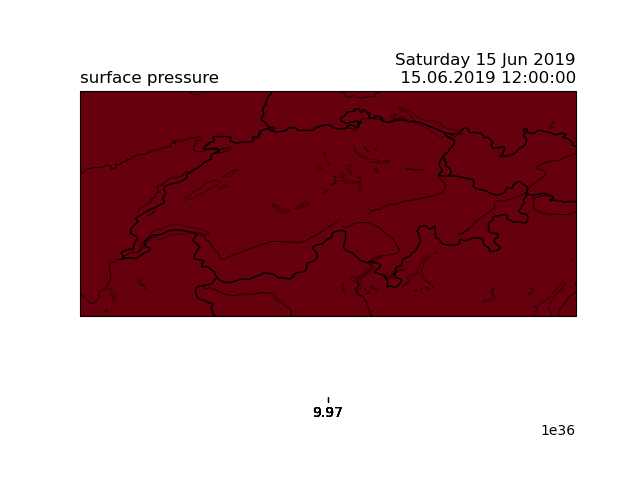

In [49]:
from formatoptions import Borders, CustomText, Rivers, Lakes, StandardTitle, MeanMaxWind
newfigure1 = ds_nc.psy.plot.mapplot(
    name="ps", time=0, 
    borders=True, 
    cmap='Reds', 
    rivers=True, 
    lakes=True,
    #bounds=np.linspace(275, 315, 60, endpoint=True).tolist(),
    #datagrid={'c': 'k', 'lw': 0.1},
    standardtitle=True,
    map_extent=[5.5, 11.0, 45.5, 48.0], xgrid=None, ygrid=None
)

In [9]:
ds.ua.encoding

{'zlib': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': False,
 'chunksizes': (1, 1, 10700),
 'source': '/users/vcherkas/visfiles/mch_opr_r04b07_lhn_12_atm_3d_ml_20190615T120000Z_nogrid.nc',
 'original_shape': (2, 80, 10700),
 'dtype': dtype('float64'),
 'coordinates': 'clon clat'}

In [7]:
from grid import *
ds = combine_grid_information(ds_nc, gridfile_for_nc)
ds

<xarray.Dataset>
Dimensions:                        (height: 80, bnds: 2, height_2: 81, height_3: 1, depth: 9, depth_2: 1, depth_3: 8, height_4: 1, depth_4: 1, time: 2, cell: 10700, edge: 16209, vertices: 3, no: 4, cart: 2)
Coordinates: (12/27)
  * height                         (height) float64 1.0 2.0 3.0 ... 79.0 80.0
    height_bnds                    (height, bnds) float64 1.0 2.0 ... 80.0 81.0
  * height_2                       (height_2) float64 1.0 2.0 3.0 ... 80.0 81.0
  * height_3                       (height_3) float64 10.0
  * depth                          (depth) float64 0.0 5.0 ... 1.458e+04
  * depth_2                        (depth_2) float64 0.0
    ...                             ...
    zonal_normal_primal_edge       (edge) float64 -0.5786 -0.5769 ... 0.4122
    meridional_normal_primal_edge  (edge) float64 0.8156 0.8168 ... 0.9111
    edge_system_orientation        (edge) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    zn                             (edge) float64 -0.5786 -0.5769 ... 0.4122
    mn                             (edge) float64 0.8156 0.8168 ... 0.9111
    normal_edge                    (cart, edge) float64 -0.5786 ... 0.9111
Dimensions without coordinates: bnds, cell, edge, vertices, no, cart
Data variables: (12/117)
    ua                             (time, height, cell) float64 ...
    va                             (time, height, cell) float64 ...
    vt                             (time, height, edge) float64 ...
    qc                             (time, height, cell) float64 ...
    qi                             (time, height, cell) float64 ...
    qr                             (time, height, cell) float64 ...
    ...                             ...
    rho_snow                       (time, cell) float64 0.0 0.0 0.0 ... 0.0 0.0
    h_snow                         (time, cell) float64 0.0 0.0 0.0 ... 0.0 0.0
    freshsnow                      (time, cell) float64 0.0 0.0 0.0 ... 1.0 1.0
    ddt_vn_adv                     (time, height, edge) float64 ...
    ddt_vn_pgr                     (time, height, edge) float64 ...
    exner                          (time, height, cell) float64 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  99
    uuidOfHGrid:          882d118c-46ca-069e-cce8-c209d51c2600
    uuidOfVGrid:          67efd2b3-7032-89af-27e3-b13861882b20
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-nwp.git@4ca3d33aea653c...
    history:              /scratch/snx3000/vcherkas/icon/build_gpu_nvidia/bin...
    references:           see MPIM/DWD publications
    comment:              Victoria Cherkas, ETHZ (vcherkas) on nid03509 (Linu...

In [13]:
ds = psy.open_dataset(f_icon_irr, engine='cfgrib', backend_kwargs={'indexpath': '', 'errors': 'ignore'})
ds

ERROR:cfgrib.messages:skipping corrupted Message
Traceback (most recent call last):
  File "/users/vcherkas/miniconda3/envs/psyplot/lib/python3.9/site-packages/cfgrib/messages.py", line 261, in itervalues
    yield self.filestream.message_from_file(file, errors=errors)
  File "/users/vcherkas/miniconda3/envs/psyplot/lib/python3.9/site-packages/cfgrib/messages.py", line 328, in message_from_file
    return Message.from_file(file, offset, **kwargs)
  File "/users/vcherkas/miniconda3/envs/psyplot/lib/python3.9/site-packages/cfgrib/messages.py", line 94, in from_file
    codes_id = eccodes.codes_grib_new_from_file(file)
  File "/users/vcherkas/miniconda3/envs/psyplot/lib/python3.9/site-packages/gribapi/gribapi.py", line 411, in grib_new_from_file
    GRIB_CHECK(err)
  File "/users/vcherkas/miniconda3/envs/psyplot/lib/python3.9/site-packages/gribapi/gribapi.py", line 228, in GRIB_CHECK
    errors.raise_grib_error(errid)
  File "/users/vcherkas/miniconda3/envs/psyplot/lib/python3.9/site-pack

<xarray.Dataset>
Dimensions:               (values: 1028172, generalVerticalLayer: 80,
                           depthBelowLandLayer: 8, depthBelowLand: 9)
Coordinates: (12/20)
    number                int64 ...
    time                  datetime64[ns] ...
    step                  timedelta64[ns] ...
    surface               float64 ...
    valid_time            datetime64[ns] ...
    isobaricLayer         float64 ...
    ...                    ...
    meanSea               float64 ...
  * depthBelowLandLayer   (depthBelowLandLayer) float64 0.0 0.01 ... 2.43 7.29
    heightAboveGround     float64 ...
    lakeBottom            float64 ...
    entireLake            float64 ...
  * depthBelowLand        (depthBelowLand) float64 0.0 0.005 0.02 ... 4.86 14.58
Dimensions without coordinates: values
Data variables: (12/61)
    snfalb                (values) float32 ...
    lhtfl                 (values) float32 ...
    nlwrf                 (values) float32 ...
    dlwrf                 (values) float32 ...
    ulwrf                 (values) float32 ...
    shtfl                 (values) float32 ...
    ...                    ...
    T_MNW_LK              (values) float32 ...
    sst                   (values) float32 ...
    T_SNOW                (values) float32 ...
    sot                   (depthBelowLand, values) float32 ...
    T_WML_LK              (values) float32 ...
    tp                    (values) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich
    history:                 2022-03-29T15:57 GRIB to CDM+CF via cfgrib-0.9.1...

## 2.1 Open the corresponding R19B08 Grid for the GRIB file:
(No engine neeeded, engine only needed for grid files.)

In [8]:
ds_grid = psy.open_dataset(gridfile)
ds_grid

<xarray.Dataset>
Dimensions:                        (cell: 1028172, vertex: 515582, edge: 1543753, nv: 3, nc: 2, ne: 6, no: 4, max_chdom: 1, cell_grf: 14, edge_grf: 24, vert_grf: 13)
Coordinates:
    clon                           (cell) float64 ...
    clat                           (cell) float64 ...
    vlon                           (vertex) float64 ...
    vlat                           (vertex) float64 ...
    elon                           (edge) float64 ...
    elat                           (edge) float64 ...
    clon_vertices                  (cell, nv) float64 ...
    clat_vertices                  (cell, nv) float64 ...
    elon_vertices                  (edge, no) float64 ...
    elat_vertices                  (edge, no) float64 ...
    vlon_vertices                  (vertex, ne) float64 ...
    vlat_vertices                  (vertex, ne) float64 ...
Dimensions without coordinates: cell, vertex, edge, nv, nc, ne, no, max_chdom, cell_grf, edge_grf, vert_grf
Data variables: (12/45)
    cartesian_x_vertices           (vertex) float64 ...
    cartesian_y_vertices           (vertex) float64 ...
    cartesian_z_vertices           (vertex) float64 ...
    cell_area                      (cell) float64 ...
    dual_area                      (vertex) float64 ...
    lon_cell_centre                (cell) float64 ...
    ...                             ...
    end_idx_e                      (max_chdom, edge_grf) int32 ...
    refin_v_ctrl                   (vertex) int32 ...
    start_idx_v                    (max_chdom, vert_grf) int32 ...
    end_idx_v                      (max_chdom, vert_grf) int32 ...
    parent_edge_index              (edge) int32 ...
    parent_vertex_index            (vertex) int32 ...
Attributes: (12/18)
    title:                ICON grid description
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               svn://rclh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    number_of_grid_used:  1
    ICON_grid_file_uri:   
    centre:               215
    ...                   ...
    inverse_flattening:   0.0
    grid_level:           8
    grid_root:            19
    uuidOfParHGrid:       2ca46b23-4b4f-fa2c-174f-7021314c2820
    uuidOfHGrid:          fc046f09-ed97-850e-1e31-8927421b2b60
    global_grid:          0

In [9]:
def openfiles(file, gridfile):
    ds_cfgrib = psy.open_dataset(file, engine='cfgrib',  backend_kwargs={'indexpath': '', 'errors': 'ignore'})
    ds_grid = psy.open_dataset(gridfile)
    return ds_cfgrib, ds_grid

In [10]:
from grid import *

ds, grid = openfiles(f_icon_irr, gridfile)

ERROR:cfgrib.messages:skipping corrupted Message
Traceback (most recent call last):
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cfgrib/messages.py", line 239, in __iter__
    yield self.message_from_file(file, errors=self.errors)
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cfgrib/messages.py", line 255, in message_from_file
    return self.message_class.from_file(file, offset, **kwargs)
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cfgrib/messages.py", line 94, in from_file
    codes_id = eccodes.codes_grib_new_from_file(file)
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/gribapi/gribapi.py", line 411, in grib_new_from_file
    GRIB_CHECK(err)
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/gribapi/gribapi.py", line 228, in GRIB_CHECK
    errors.raise_grib_error(errid)
  File "/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/gribapi/errors.py", line 382, in raise_grib_er

In [12]:
ds = combine_grid_information(ds, grid)
ds

<xarray.Dataset>
Dimensions:                  (time: 1, cell: 1028172, generalVerticalLayer: 80, depthBelowLandLayer: 8, depthBelowLand: 9, vertices: 3)
Coordinates: (12/24)
    number                   int64 ...
    forecast_reference_time  datetime64[ns] ...
    step                     timedelta64[ns] ...
    surface                  float64 ...
  * time                     (time) datetime64[ns] 2021-11-23
    isobaricLayer            float64 ...
    ...                       ...
    entireLake               float64 ...
  * depthBelowLand           (depthBelowLand) float64 0.0 0.005 ... 4.86 14.58
    clon                     (cell) float32 -0.003694 -0.003783 ... 0.2607
    clat                     (cell) float32 0.8636 0.8635 ... 0.868 0.8679
    clat_bnds                (cell, vertices) float32 0.8635 0.8637 ... 0.8678
    clon_bnds                (cell, vertices) float32 -0.003566 ... 0.2605
Dimensions without coordinates: cell, vertices
Data variables: (12/61)
    snfalb                   (time, cell) float32 0.07 0.07 ... 0.1171 0.1179
    lhtfl                    (time, cell) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    nlwrf                    (time, cell) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dlwrf                    (time, cell) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ulwrf                    (time, cell) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    shtfl                    (time, cell) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...                       ...
    T_MNW_LK                 (time, cell) float32 277.2 277.2 ... 277.1 277.1
    sst                      (time, cell) float32 285.9 285.9 285.8 ... nan nan
    T_SNOW                   (time, cell) float32 0.0 0.0 0.0 ... 273.4 273.9
    sot                      (time, depthBelowLand, cell) float32 273.1 ... 2...
    T_WML_LK                 (time, cell) float32 277.2 277.2 ... 277.1 277.1
    tp                       (time, cell) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich
    history:                 2022-03-22T11:40 GRIB to CDM+CF via cfgrib-0.9.9...

In [153]:
f_vt_vn = '/scratch/vcherkas/icon-vis/data/example_data/grib/vnvt00010000'
f_grid  = '/scratch/vcherkas/icon-vis/data/example_data/grids/icon_grid_0001_R19B08_mch.nc'

In [164]:
ds_v = psy.open_dataset(f_vt_vn, engine='cfgrib',
                        backend_kwargs={
                            'indexpath': '', 'errors': 'ignore',
                            "read_keys": ["typeOfLevel", "gridType"],
                            "filter_by_keys": {"typeOfLevel": "generalVerticalLayer"},
                        }, encode_cf=("time", "geography", "vertical"))
ds_v

<xarray.Dataset>
Dimensions:               (generalVerticalLayer: 80, values: 1567452)
Coordinates:
    number                int64 ...
    time                  datetime64[ns] ...
    step                  timedelta64[ns] ...
  * generalVerticalLayer  (generalVerticalLayer) float64 1.0 2.0 ... 79.0 80.0
    valid_time            datetime64[ns] ...
Dimensions without coordinates: values
Data variables:
    VN                    (generalVerticalLayer, values) float32 ...
    VT                    (generalVerticalLayer, values) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich
    history:                 2022-03-21T16:34 GRIB to CDM+CF via cfgrib-0.9.9...

In [165]:
grid_v = psy.open_dataset(f_grid)
grid_v

<xarray.Dataset>
Dimensions:                        (cell: 1043968, vertex: 523485, edge: 1567452, nv: 3, nc: 2, ne: 6, no: 4, max_chdom: 1, cell_grf: 14, edge_grf: 24, vert_grf: 13)
Coordinates:
    clon                           (cell) float64 ...
    clat                           (cell) float64 ...
    vlon                           (vertex) float64 ...
    vlat                           (vertex) float64 ...
    elon                           (edge) float64 ...
    elat                           (edge) float64 ...
    clon_vertices                  (cell, nv) float64 ...
    clat_vertices                  (cell, nv) float64 ...
    elon_vertices                  (edge, no) float64 ...
    elat_vertices                  (edge, no) float64 ...
    vlon_vertices                  (vertex, ne) float64 ...
    vlat_vertices                  (vertex, ne) float64 ...
Dimensions without coordinates: cell, vertex, edge, nv, nc, ne, no, max_chdom, cell_grf, edge_grf, vert_grf
Data variables: (12/45)
    cartesian_x_vertices           (vertex) float64 ...
    cartesian_y_vertices           (vertex) float64 ...
    cartesian_z_vertices           (vertex) float64 ...
    cell_area                      (cell) float64 ...
    dual_area                      (vertex) float64 ...
    lon_cell_centre                (cell) float64 ...
    ...                             ...
    end_idx_e                      (max_chdom, edge_grf) int32 ...
    refin_v_ctrl                   (vertex) int32 ...
    start_idx_v                    (max_chdom, vert_grf) int32 ...
    end_idx_v                      (max_chdom, vert_grf) int32 ...
    parent_edge_index              (edge) int32 ...
    parent_vertex_index            (vertex) int32 ...
Attributes: (12/18)
    title:                ICON grid description
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               svn://rclh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    number_of_grid_used:  1
    ICON_grid_file_uri:   
    centre:               215
    ...                   ...
    inverse_flattening:   0.0
    grid_level:           8
    grid_root:            19
    uuidOfParHGrid:       e6ddd597-9c90-27b1-fbac-c40d47f72ba0
    uuidOfHGrid:          5a0a863d-2523-9515-7789-4930e3452bc0
    global_grid:          0

In [166]:
ds_v = combine_grid_information(ds_v, grid_v)
ds_v

<xarray.Dataset>
Dimensions:                  (generalVerticalLayer: 80, time: 1, edge: 1567452, no: 4)
Coordinates:
    number                   int64 1
    forecast_reference_time  datetime64[ns] 2022-02-16
    step                     timedelta64[ns] 01:00:00
  * generalVerticalLayer     (generalVerticalLayer) float64 1.0 2.0 ... 80.0
  * time                     (time) datetime64[ns] 2022-02-16T01:00:00
    elon                     (edge) float32 0.2893 0.2896 ... 0.2423 0.2421
    elat                     (edge) float32 0.7384 0.7386 ... 0.7473 0.7472
    elat_bnds                (edge, no) float32 0.7383 0.7472 ... 0.7471 0.7472
    elon_bnds                (edge, no) float32 0.2892 0.2422 ... 0.2422 0.242
Dimensions without coordinates: edge, no
Data variables:
    VN                       (time, generalVerticalLayer, edge) float32 -8.48...
    VT                       (time, generalVerticalLayer, edge) float32 0.000...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich
    history:                 2022-03-21T16:34 GRIB to CDM+CF via cfgrib-0.9.9...

In [167]:
ds_v.VN.encoding

{'source': '/scratch/vcherkas/icon-vis/data/example_data/grib/vnvt00010000',
 'filter_by_keys': {'typeOfLevel': 'generalVerticalLayer'},
 'encode_cf': ('time', 'geography', 'vertical'),
 'original_shape': (80, 1567452),
 'dtype': dtype('float32'),
 'coordinates': 'number time step generalVerticalLayer valid_time elat elon'}

In [2]:
type(ds1)

NameError: name 'ds1' is not defined